# langGraph构建图和节点例子

In [1]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [2]:
class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

In [ ]:
import os
from langchain.chat_models import init_chat_model

os.environ["OPENAI_API_KEY"] = "sk-..."

llm = init_chat_model("openai:gpt-4.1")

In [ ]:
import os
from langchain.chat_models import init_chat_model

# 设置自定义API配置
os.environ["QWEN_API_KEY"] = "You API Key"
os.environ["QWEN_API_BASE"] = "https://dashscope.aliyuncs.com/compatible-mode/v1"

# 使用自定义配置
llm = init_chat_model(
    model="qwen-plus-latest",
    model_provider="openai",
    api_key=os.environ["QWEN_API_KEY"],
    base_url=os.environ["QWEN_API_BASE"]
)

In [6]:
def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)

In [7]:
graph_builder.add_edge(START, "chatbot")

In [8]:
graph_builder.add_edge("chatbot", END)

In [9]:
graph = graph_builder.compile()

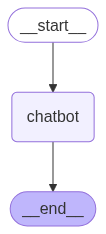

In [10]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [11]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)


while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break
        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

User:  中国电车逆袭之路


Assistant: 中国电动汽车的逆袭之路是一段充满挑战与突破的发展历程，体现了技术创新、政策支持、市场潜力和产业链优势的多重作用。以下从多个维度分析这一过程：

---

### **1. 政策驱动：顶层设计的长期布局**
- **早期扶持（2009-2015年）**  
  中国自2009年启动“十城千辆”工程，通过补贴、税收优惠等推动新能源汽车试点，虽初期面临技术不成熟、骗补等问题，但为产业奠定了基础。
- **双积分政策（2017年）**  
  借鉴欧美经验推出的“双积分”制度（油耗积分+新能源积分），倒逼车企转型，迫使合资品牌加速电动化。
- **基础设施先行**  
  截至2023年，中国充电桩数量超600万台，车桩比降至2.5:1，充电便利性显著提升。

---

### **2. 技术创新：从模仿到自主突破**
- **电池革命：宁德时代与比亚迪的崛起**  
  宁德时代凭借锂离子电池技术（如CTP、钠离子电池）成为全球龙头；比亚迪刀片电池以安全性重塑行业标准，带动自主品牌市占率回升。
- **智能网联：软件定义汽车**  
  蔚来、小鹏、理想等新势力将OTA升级、自动驾驶（如华为ADS）、车载系统（鸿蒙座舱）推向国际前沿，形成差异化竞争力。
- **全产业链掌控**  
  从锂矿（赣锋锂业）、正极材料（容百科技）到电池回收（格林美），中国构建了覆盖全球70%以上的动力电池供应链。

---

### **3. 市场爆发：消费认知与规模效应**
- **价格战与消费升级并行**  
  2023年特斯拉降价引发激烈竞争，比亚迪推出多品牌（王朝系列+腾势+仰望）覆盖全价位，A00级车（五菱宏光MINI EV）打开下沉市场。
- **出口狂飙：全球化布局**  
  2023年中国汽车出口量跃居全球第二（400万辆+），其中电动车占比超30%，重点布局东南亚、欧洲（比亚迪、蔚来）、中东等地，建立海外工厂（如上汽在泰国、比亚迪在匈牙利）。
- **品牌高端化尝试**  
  蔚来ET5、极氪001、小米SU7等瞄准豪华市场，挑战BBA地位；仰望U8、昊铂增程版展现技术实力。

---

### **4. 挑战与争议：成长中的阵痛**
- **产能过剩与内卷**  
  2023年新能源车渗透率超35%，但行业集中度低，部分企业依赖补贴或面临亏损

User:  quit


Goodbye!


# LangGraph工具整合基本介绍

In [ ]:
!pip install -U langchain-tavily

In [14]:
import os
import getpass
def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("TAVILY_API_KEY")

TAVILY_API_KEY:  ········


## tavily测试工具

In [15]:
from langchain_tavily import TavilySearch

tool = TavilySearch(max_results=2)
tools = [tool]
tool.invoke("langGraph核心是什么？")

{'query': 'langGraph核心是什么？',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://www.cnblogs.com/muzinan110/p/18539969',
   'title': 'LangGraph入门：核心概念与基础组件- muzinan110 - 博客园',
   'content': 'LangGraph是LangChain生态系统中的一个新成员,它提供了一个基于图(Graph)的框架来构建复杂的LLM应用。通过将应用逻辑组织成有向图的形式,LangGraph使得',
   'score': 0.8737439,
   'raw_content': None},
  {'url': 'https://zhuanlan.zhihu.com/p/15559562499',
   'title': 'LangGraph 核心思想及关键技术介绍 - 知乎专栏',
   'content': "LangGraph 核心思想及关键技术介绍 - 知乎 Image 1) LangGraph 核心思想及关键技术介绍 Image 2: LangGraph 核心思想及关键技术介绍 LangGraph 核心思想及关键技术介绍 Image 3: 张欢 LangGraph 是一个有用于构建有状态和多角色的 Agents 应用。 LangGraph 的主要优势包括： *   灵活性：基于 Python 的特性允许无限定制和复杂逻辑。 **定位**：一个灵活的 Python 库，主要面向开发人员，适合具有编码经验和需要高度定制的AI解决方案的人员。 Image 4 Image 5 6. **节点**（Nodes）：一个Python函数，通常接收一个共享的state参数。还可接受一个config参数，如用户id、线程id等。 Image 6 Image 7 8. **Send 方法**：默认情况下，节点和边都是提前定义好的，并基于同一个共享State运行，但是有些场景下，无法提前确定边，甚至一个图内会出现 State 的不同版本。一个常见的例子就是 Map-reduce 模式（用于并行处理多个子任务），第一个节点根据入参动态生成

## 构建chat agent节点

In [ ]:
import os
from langchain.chat_models import init_chat_model

# 设置自定义API配置
os.environ["QWEN_API_KEY"] = "You API Key"
os.environ["QWEN_API_BASE"] = "https://dashscope.aliyuncs.com/compatible-mode/v1"

# 使用自定义配置
llm = init_chat_model(
    model="qwen-plus-latest",
    model_provider="openai",
    api_key=os.environ["QWEN_API_KEY"],
    base_url=os.environ["QWEN_API_BASE"]
)

## 构建AGI组织结构图

In [17]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

# Modification: tell the LLM which tools it can call
# highlight-next-line
llm_with_tools = llm.bind_tools(tools)

def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)

### 工具节点类
用于在LangChain图中执行工具调用。让我简洁地解释：

#### BasicToolNode 类的作用

**核心功能**：接收AI消息中的工具调用请求，执行相应工具，并返回结果

##### 工作流程

###### 1. 初始化 (`__init__`)：
- 接收工具列表
- 创建工具名称到工具对象的映射字典

###### 2. 执行 (`__call__`)：
- 从输入中获取消息列表
- 取最后一条消息（通常是AI的响应）
- 遍历消息中的所有工具调用

###### 3. 处理每个工具调用：
- 根据工具名称找到对应工具
- 用工具参数执行工具：`tool.invoke(tool_call["args"])`
- 将结果包装成 `ToolMessage` 对象

###### 4. 返回结果：
- 返回包含所有工具执行结果的消息列表

##### 关键点

- **输入格式**：`{"messages": [...]}`
- **输出格式**：`{"messages": [ToolMessage对象列表]}`
- **ToolMessage包含**：执行结果、工具名称、调用ID

#### 使用示例

```python  
# 创建工具节点  
tool_node = BasicToolNode(tools=[tool])  
# 添加到图中  
graph_builder.add_node("tools", tool_node)  

In [18]:
import json

from langchain_core.messages import ToolMessage


class BasicToolNode:
    """A node that runs the tools requested in the last AIMessage."""

    def __init__(self, tools: list) -> None:
        self.tools_by_name = {tool.name: tool for tool in tools}

    def __call__(self, inputs: dict):
        if messages := inputs.get("messages", []):
            message = messages[-1]
        else:
            raise ValueError("No message found in input")
        outputs = []
        for tool_call in message.tool_calls:
            tool_result = self.tools_by_name[tool_call["name"]].invoke(
                tool_call["args"]
            )
            outputs.append(
                ToolMessage(
                    content=json.dumps(tool_result),
                    name=tool_call["name"],
                    tool_call_id=tool_call["id"],
                )
            )
        return {"messages": outputs}


tool_node = BasicToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)

### 路由决策函数和对话流程图的构建
route_tools 函数
作用：决定对话的下一步去向

逻辑：

获取最后一条消息（AI的回复）
检查是否包含工具调用
有工具调用 → 返回 "tools"（去执行工具）
无工具调用 → 返回 END（结束对话）

```mermaid  
graph TD  
    A[START] --> B[chatbot]  
    B --> C{route_tools决策<br/>有工具调用？}  
    C -->|是| D[tools]  
    C -->|否| E[END]  
    D --> B  

In [19]:
def route_tools(
    state: State,
):
    """
    Use in the conditional_edge to route to the ToolNode if the last message
    has tool calls. Otherwise, route to the end.
    """
    if isinstance(state, list):
        ai_message = state[-1]
    elif messages := state.get("messages", []):
        ai_message = messages[-1]
    else:
        raise ValueError(f"No messages found in input state to tool_edge: {state}")
    if hasattr(ai_message, "tool_calls") and len(ai_message.tool_calls) > 0:
        return "tools"
    return END


# The `tools_condition` function returns "tools" if the chatbot asks to use a tool, and "END" if
# it is fine directly responding. This conditional routing defines the main agent loop.
graph_builder.add_conditional_edges(
    "chatbot",
    route_tools,
    # The following dictionary lets you tell the graph to interpret the condition's outputs as a specific node
    # It defaults to the identity function, but if you
    # want to use a node named something else apart from "tools",
    # You can update the value of the dictionary to something else
    # e.g., "tools": "my_tools"
    {"tools": "tools", END: END},
)
# Any time a tool is called, we return to the chatbot to decide the next step
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START, "chatbot")
graph = graph_builder.compile()

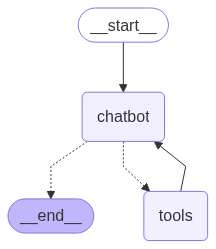

In [20]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [21]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)

while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

User:  中国新能源电池逆袭之路


Assistant: 
Assistant: {"query": "\u4e2d\u56fd\u65b0\u80fd\u6e90\u7535\u6c60\u9006\u88ad\u4e4b\u8def", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "http://auto.people.com.cn/n1/2017/0724/c1005-29422931.html", "title": "\u4e2d\u56fd\u65b0\u80fd\u6e90\u6c7d\u8f66\u7684\u201c\u9006\u88ad\u4e4b\u8def\u201d - \u4eba\u6c11\u7f51", "content": "\u2014\u2014\u6280\u672f\u8fdb\u6b65\u7a81\u98de\u731b\u8fdb\u30025\u5e74\u524d\uff0c\u4e2d\u56fd\u7535\u52a8\u6c7d\u8f66\u7eed\u822a\u91cc\u7a0b\u53ea\u6709100\u516c\u91cc\uff0c\u73b0\u5728\uff0c\u7535\u6c60\u6210\u672c\u51cf\u5c11\u8fd1\u4e00\u534a\uff0c\u6027\u80fd\u63d0\u9ad830%\uff0c\u7eed\u822a\u91cc\u7a0b\u63d0\u5347\u81f3300\u516c\u91cc\u3002", "score": 0.83742094, "raw_content": null}, {"url": "https://www.juda.cn/news/202461.html", "title": "\u65b0\u80fd\u6e90\u6c7d\u8f66\u9006\u88ad\u80cc\u540e\u7684\u53d8\u5c40\u52a8\u529b\u9502\u79bb\u5b50\u7535\u6c60\u5382\u5546\u5d1b\u8d77\u4e4b\u8def - \u949c\u5927\u950

User:  quit


Goodbye!


## 用LangGraph自带ToolNode, tools_condition来实现

In [ ]:
from typing import Annotated

from langchain_tavily import TavilySearch
from langchain_core.messages import BaseMessage
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition

class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

tool = TavilySearch(max_results=2)
tools = [tool]
llm_with_tools = llm.bind_tools(tools)

def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)

tool_node = ToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
# Any time a tool is called, we return to the chatbot to decide the next step
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START, "chatbot")
graph = graph_builder.compile()